# Tutorial on using themrohubcleint to retrieve a remote database and do a batch calculation. 

### Import thermohubclient 

In [1]:
import thermohubclient as client

### connect to the remote db.thermohub.org database

In [2]:
dbc = client.DatabaseClient()

### List avialable ThermoDataSets

In [3]:
dbc.availableThermoDataSets()

['"mines19"',
 '"heracles"',
 '"slop98-organic"',
 '"slop16"',
 '"aq17"',
 '"psinagra-12-07"',
 '"slop98-inorganic"',
 '"mines16"',
 '"cemdata18"']

### Save a database to file

In [4]:
dbc.saveDatabase("mines19")

### List elements in thermodataset

In [5]:
dbc.elementsInThermoDataSet("mines19")

['"Ag"',
 '"Al"',
 '"As"',
 '"Au"',
 '"C"',
 '"Ca"',
 '"Ce"',
 '"Cl"',
 '"Cu"',
 '"Dy"',
 '"Er"',
 '"Eu"',
 '"F"',
 '"Fe"',
 '"Gd"',
 '"H"',
 '"Ho"',
 '"K"',
 '"La"',
 '"Lu"',
 '"Mg"',
 '"Mo"',
 '"Na"',
 '"Nd"',
 '"O"',
 '"P"',
 '"Pb"',
 '"Pr"',
 '"S"',
 '"Si"',
 '"Sm"',
 '"Sn"',
 '"Tb"',
 '"Ti"',
 '"Tm"',
 '"W"',
 '"Y"',
 '"Yb"',
 '"Zn"',
 '"Zr"',
 '"Zz"']

### save subset ["H", "O", "Na", "K", "Si", "Al", "Cl", "Zr", "Zz"]

In [6]:
dbc.saveDatabaseContainingElements("mines19", ["H", "O", "Na", "K", "Si", "Al", "Cl", "Zr", "Zz"])

### import thermofun

In [7]:
import thermofun as fun

### create a batch object for batch calculations

In [8]:
mines19 = fun.Database(dbc.getDatabase('mines19'))
batch = fun.ThermoBatch(mines19)

### inspect avialable batch functions. Set units to C and bar, setPropertiesUnits(["temperature", "pressure"],["degC","bar"])

In [9]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])

### print available properties 

In [10]:
print(fun.availablePropertiesSubstance())

property (unit)
---------------
enthalpy (J/mol)
entropy (J/K/mol)
gibbs_energy (J/mol)
heat_capacity_cp (J/K/mol)
heat_capacity_cv (J/K/mol)
helmholtz_energy (J/mol)
internal_energy (J/mol)
volume (J/bar)



### set propertis digits ["gibbs_energy","entropy", "volume", "temperature", "pressure"], [0, 4, 4, 0, 2]

In [11]:
batch.setPropertiesDigits(["heat_capacity_cp","entropy", "volume", "temperature", "pressure"], [4, 4, 4, 0, 2])

### set temperature and pressure increments

In [12]:
batch.setPressureIncrement(0,0,0)
batch.setTemperatureIncrement(0,300, 5)

### Calculate properties
### substances = ["Na+", "Mg+2", "Ca+2", "SiO2@"]
### properties = ["gibbs_energy","entropy", "volume"]

In [13]:
substances = ["Na+", "Mg+2", "Ca+2", "SiO2@"]
properties = ["heat_capacity_cp","entropy", "volume"]
batch.thermoPropertiesSubstance(substances, properties).toCSV('results.csv')

### inspect the results file and plot the results
from functions import plot_substances_properties_vs_temperature
figure = plot_substances_properties_vs_temperature('results.csv', substances, 0)

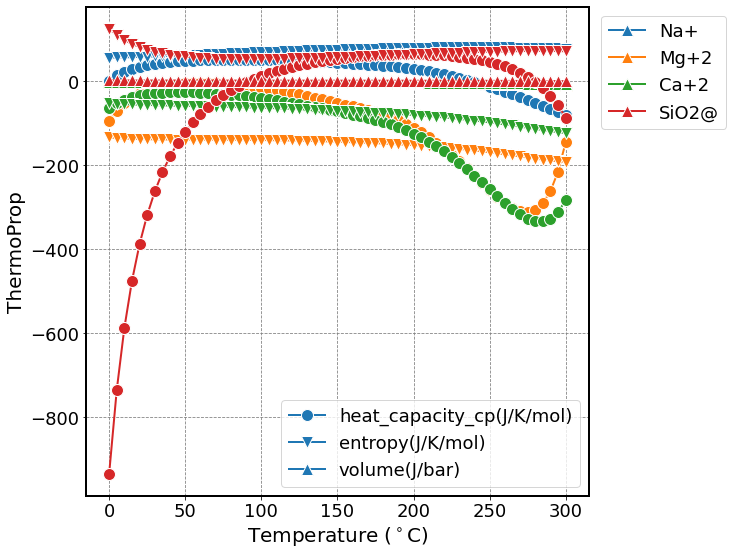

In [14]:
from functions import plot_substances_properties_vs_temperature
figure = plot_substances_properties_vs_temperature('results.csv', substances, 0)